### Support Vector Machines
Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups. Classification for multiple classes is then supported by a one-vs-all method (just like we previously did for Logistic Regression for Multi Class Classification).

This lecture section will be broken up by the following sections:

    Part 1: Introduction to Support Vector Machines  
    Part 2: SVM General Explanation  
    Part 3: Computing the Hyperplane  
    Part 4: Additional Math Resources  
    Part 5: SVM with Sci Kit Learn  
    Part 6: Additional Resources  

### Part 1: Introduction to Support Vector Machines

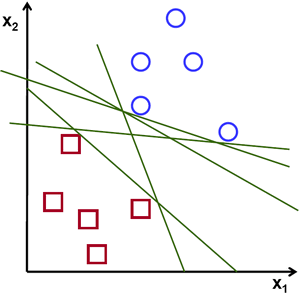

In [43]:
from IPython.display import Image
Image('http://docs.opencv.org/2.4/_images/separating-lines.png')

Find an "optimal" hyperplane (line)
Optimal: separeates with the maximum margin b/w the two classes

The advantages of support vector machines are:  
- Effective in high dimensional spaces.  
- Still effective in cases where number of dimensions is greater than the number of samples.  
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.  
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
  
The disadvantages of support vector machines include:
- If the number of features is much greater than the number of samples, the method is likely to give poor performances.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

### Part 2: SVM general explanation

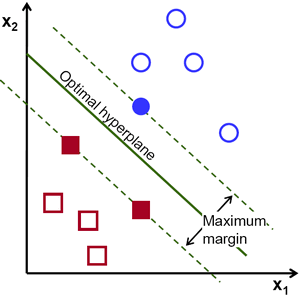

In [44]:
Image('http://docs.opencv.org/2.4/_images/optimal-hyperplane.png')

The vectors(observation points) closest to the hyperplanes are called support vectors. (coloured in the image above)

### Part 3: Computing the Hyperplane
Let hyperplane a function of x, denoted as:
\begin{equation}
    f(x) = \beta_0 + \beta^{T}x
\end{equation}  
To maximise the margine b/w the two classes,  
$$ | \beta_0 + \beta^T x | =1 $$
where x is support vectors. 

The distance b/w canonical hyperplane and support vectors is,
$$ distance_{support\:vectors} = \frac{|\: \beta_0 + \beta^T x \:|}{||\:\beta\:||} = \frac{1}  {||\:\beta \: ||}$$
Max margin,$ M$, is twice the distance of $distance_{support\:vector}$
$$ M = \frac{2}{|| \:\beta\:||}$$

Finally, the problem of maximizing M is equivalent to the problem of minimizing a function $L(\beta)$ subject to some constraints. The constraints model the requirement for the hyperplane to classify correctly all the training examples $x_i$. Formally,

$$\min_{\beta, \beta_{0}} L(\beta) = \frac{1}{2}||\beta||^{2} \text{ subject to } y_{i}(\beta^{T} x_{i} + \beta_{0}) \geq 1 \text{ } \forall i$$

where $y_i$ represents each of the labels of the training examples.  

This is a problem of [Lagrangian optimization](http://en.wikipedia.org/wiki/Lagrange_multiplier) that can be solved using Lagrange multipliers to obtain the weight vector $\beta$ and the bias $\beta_0$ of the optimal hyperplane.

If we want to do non-linear classification we can employ the [kernel trick](http://en.wikipedia.org/wiki/Kernel_method). Using the kernel trick we can "slice" the feature space with a Hyperplane.  
For a quick illustraion of what this looks like, check out both the image and the video below!

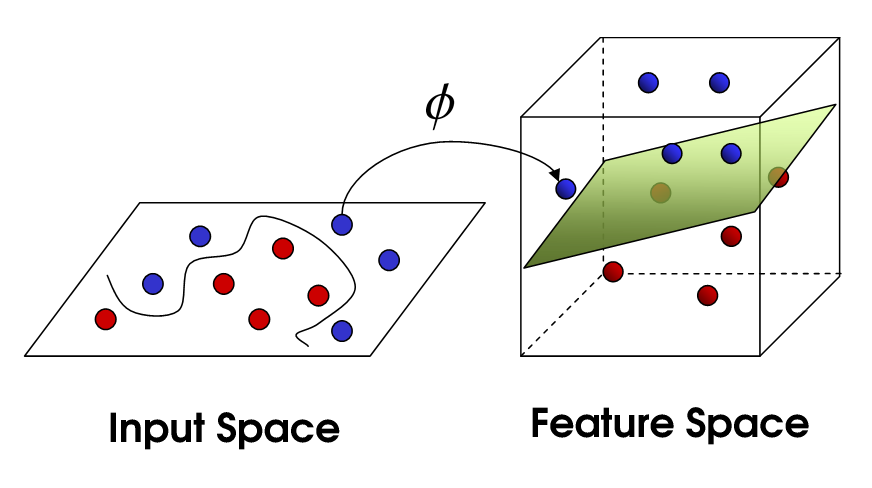

In [45]:
#Kernel trick
Image('http://i.imgur.com/WuxyO.png',width=500, height=300)

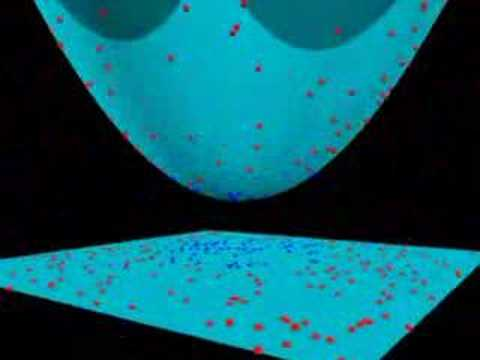

In [46]:
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

### More math resourses

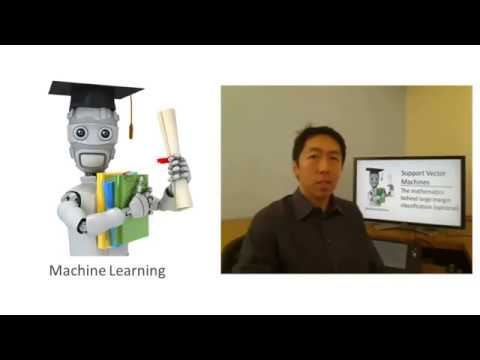

In [47]:
#Andrew Ng's Lecture
YouTubeVideo('QKc3Tr7U4Xc')

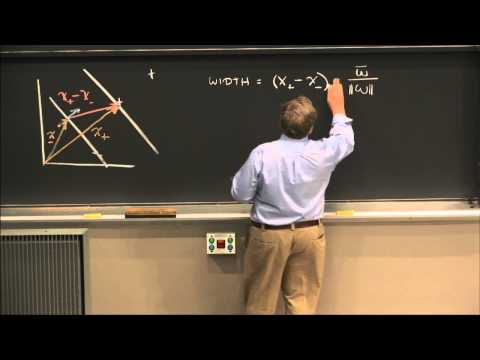

In [48]:
# MIT Lecture
YouTubeVideo('_PwhiWxHK8o')

### Step 5: SVM in Python

In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import datasets

In [71]:
iris= datasets.load_iris()
X=iris.data
Y=iris.target

In [72]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [73]:
from sklearn.svm import SVC

In [74]:
X_train, X_test,Y_train, Y_test= sklearn.model_selection.train_test_split(X,Y, random_state=3,test_size=0.4)

In [75]:
svm= SVC()
svm.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
Y_pred=svm.predict(X_test)

In [77]:
print(sklearn.metrics.accuracy_score(Y_test,Y_pred))

0.966666666667


In [78]:
sklearn.metrics.confusion_matrix(Y_test,Y_pred)

array([[22,  0,  0],
       [ 0, 18,  2],
       [ 0,  0, 18]])

Explore other kernel types  
In this lecture, we explore two linear models and two non linear models.  
Linear:  
- LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
- LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction  

Non-Linear
- [Gausian Radial Basis Function](http://en.wikipedia.org/wiki/Radial_basis_function)
- SVC with polynomial kernel

In [79]:
from sklearn import svm

In [80]:
X= iris.data[:, :2]
Y=iris.target

In [81]:
svc=svm.SVC(kernel='linear').fit(X,Y)
rbf_svc=svm.SVC(kernel='rbf', gamma=0.7).fit(X,Y)
poly_svc=svm.SVC(kernel='poly',degree=3).fit(X,Y)
lin_svc=svm.LinearSVC().fit(X,Y)

In [82]:
## Vidualise to see the fit of the model
# First, define the mesh
X_min=X[:,0].min()-1
X_max= X[:,0].max()+1
Y_min=X[:,1].min()-1
Y_max=X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(X_min,X_max,0.02), np.arange(Y_min,Y_max,0.02))

In [83]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

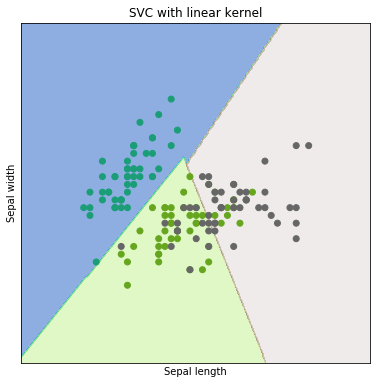

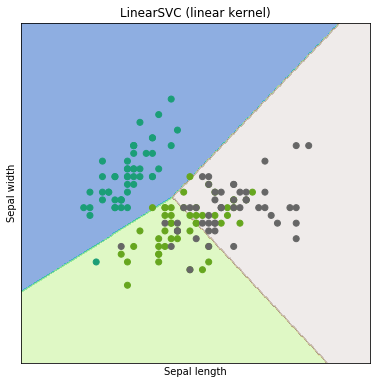

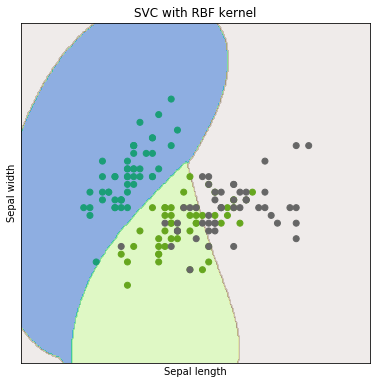

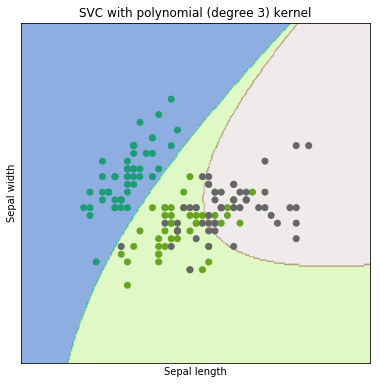

In [168]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1) # i+1 for the location 
    plt.subplots_adjust(wspace=0.4, hspace=0.4)# spacing b/w figures
    
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])  # xx.shape= (220,280), xx.raval().shape=(61600,), np.c_[xx.ravel(),yy.ravel()].shape=(61600,2)
    Z=Z.reshape(xx.shape)  # Z.shape=(220,280)
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())  # 目盛りを消す
    plt.yticks(())
    plt.title(titles[i])

3

In [102]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
clf.predict(np.c_[xx.ravel(), yy.ravel()])

array([0, 0, 0, ..., 2, 2, 2])

In [115]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 3.3 ,  1.  ],
       [ 3.32,  1.  ],
       [ 3.34,  1.  ],
       ..., 
       [ 8.84,  5.38],
       [ 8.86,  5.38],
       [ 8.88,  5.38]])

([], <a list of 0 Text xticklabel objects>)


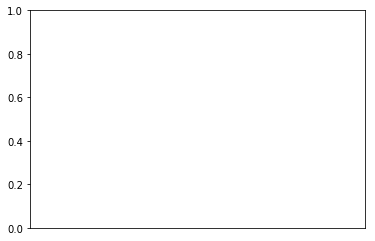

In [145]:
enumerate((svc, lin_svc, rbf_svc, poly_svc))

In [146]:
((svc, lin_svc, rbf_svc, poly_svc))

(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma=0.7, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

In [147]:
(svc, lin_svc, rbf_svc, poly_svc)

(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma=0.7, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

In [148]:
enumerate(svc, lin_svc, rbf_svc, poly_svc)

TypeError: enumerate() takes at most 2 arguments (4 given)

In [159]:
type((svc, lin_svc, rbf_svc, poly_svc))

tuple

In [165]:
Z[110,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

Part 6: Additional Resources  
1.) [Microsoft Research Paper SVM Tutorial](http://research.microsoft.com/pubs/67119/svmtutorial.pdf)  
2.) [StatSoft Online Textbook](http://www.statsoft.com/Textbook/Support-Vector-Machines)  
3.) [Sci Kit Learn Documentation](http://scikit-learn.org/stable/modules/svm.html)  
4.) [Wikipedia](http://en.wikipedia.org/wiki/Support_vector_machine)  
5.) [Columbia Lecture Slides](http://www.cs.columbia.edu/~kathy/cs4701/documents/jason_svm_tutorial.pdf)  
6.) [Andrew Ng's Class Notes](http://cs229.stanford.edu/notes/cs229-notes3.pdf)



